# Implementation of Flower Pollination Algorithm for Test Functions :

In [15]:
import numpy as np
from scipy.stats import levy
import matplotlib.pyplot as plt

In [30]:
class Flower_Pollination_Algorithm():
  def __init__(self, objectif_fct, switch_probability = 0.8, n_flowers = 50, n_parameters = 2, constraints = None):
    # Initialization of variables
    self.sp = switch_probability
    self.n_flowers = n_flowers
    self.flowers = [None]*n_flowers
    self.cost = np.zeros(n_flowers)
    self.random = np.random
    self.n_parameters = n_parameters
    self.const = constraints
    self.objectif_fct = objectif_fct

    # Random Initial Flowers
    self.init_flowers()
    # Get the best flower from initial population
    self.best = self.flowers[self.cost.argmin()]

  def global_pollination(self, x): #Global pollination
    x_new = x + levy.rvs(size = x.shape[0]) * (self.best - x)
    return x_new
  
  def local_pollination(self, x, x1, x2): #Local Pollination
    x_new = x + self.random.randn() * (x1 - x2)
    return x_new

  def init_flowers(self): #Initialization of flowers
    for i in range(self.n_flowers):
      self.flowers[i] = self.random.rand(self.n_parameters)
      for j in range(self.n_parameters):
        if self.const is not None:
            self.flowers[i][j] = self.flowers[i][j] * (self.const[j][1] - self.const[j][0]) + self.const[j][0]
        else:
          self.flowers[i][j] = self.flowers[i][j] * 100 - 50
      self.cost[i] = self.objectif_fct(self.flowers[i])

  def optimize(self, max_gen = 100):
    # Save history for plotting
    history1 = []
    history2 = []

    # Generation loop
    for i in range(max_gen):

      # Flower loop
      for j in range(self.n_flowers):
        p = self.random.rand()
        
        # Global Pollination
        if p <= self.sp:
          x_temp = self.global_pollination(self.flowers[j])
        
        # Local Pollination
        else:
          r1 = self.random.randint(0, high = self.n_flowers)
          r2 = self.random.randint(0, high = self.n_flowers)
          while r2 == r1:
            r2 = self.random.randint(0, high = self.n_flowers)
              
          x_temp = self.local_pollination(self.flowers[j], self.flowers[r1], self.flowers[r2])
        
        # Apply constraints
        if self.const is not None:
          for k in range(self.n_parameters):
            x_temp = np.clip(x_temp, self.const[k][0], self.const[k][1])
        else:
          continue

        # Calculate cost
        cost_temp = self.objectif_fct(x_temp)
        
        # Compare the newly generated flower with the previous flower
        if cost_temp < self.cost[j]:
          self.flowers[j] = x_temp
          self.cost[j] = cost_temp
        else:
          continue
      
      # Update best
      self.best = self.flowers[self.cost.argmin()]
      history1.append(self.best)
      history2.append(self.objectif_fct(self.best))
       
    return self.flowers[self.cost.argmin()], history1, history2

In [31]:
def show_plot(x, y, title="", x_label= "", y_label="") :
    plt.figure(figsize=(7, 4))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [11]:
def rosenbrock_function(x):
    a = 1
    b = 100
    return sum(b * (x[1:] - x[:-1]**2)**2 + (a - x[:-1])**2)

def bent_cigar_function(x):
    if isinstance(x, list):
        x = np.array(x)
    return x[0]**2 + 1e6 * np.sum(x[1:]**2)

def discus_function(x):
    if isinstance(x, list):
        x = np.array(x)
    return 1e6 * x[0]**2 + np.sum(x[1:]**2)

def rastrigin_function(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

Optimal Solution: [1.00715251 1.01280462]
Optimal value : 0.0002918935564169017


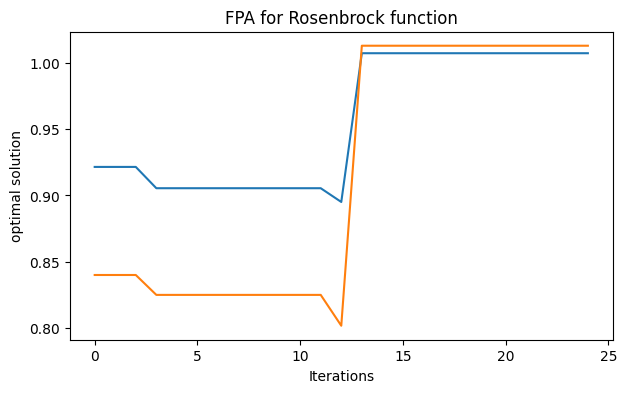

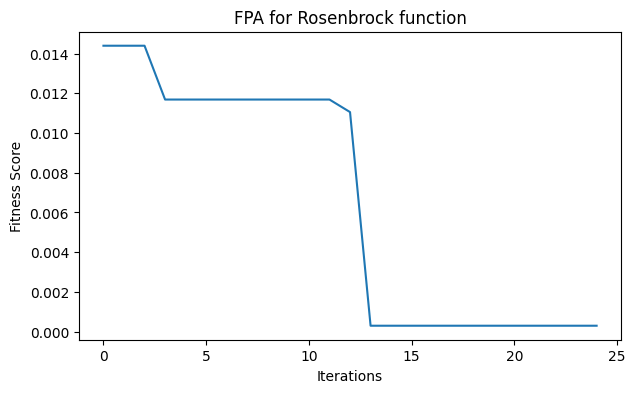

In [33]:
const = [np.array([-2.5, 2.5]), np.array([-1.5, 1.5])]
FPA_obj1 = Flower_Pollination_Algorithm(rosenbrock_function, switch_probability = 0.6, n_flowers = 30, n_parameters = 2, constraints = const)
sol, hist1, hist2 = FPA_obj1.optimize(25)
print(f"Optimal Solution: {sol}")
print(f"Optimal value : {rosenbrock_function(sol)}")

show_plot(list(range(25)), hist1, "FPA for Rosenbrock function", "Iterations", "optimal solution")
show_plot(list(range(25)), hist2, "FPA for Rosenbrock function", "Iterations", "Fitness Score")

Optimal Solution: [-1.78372754e-02 -1.70463814e-05]
Optimal value : 0.0006087475134388406


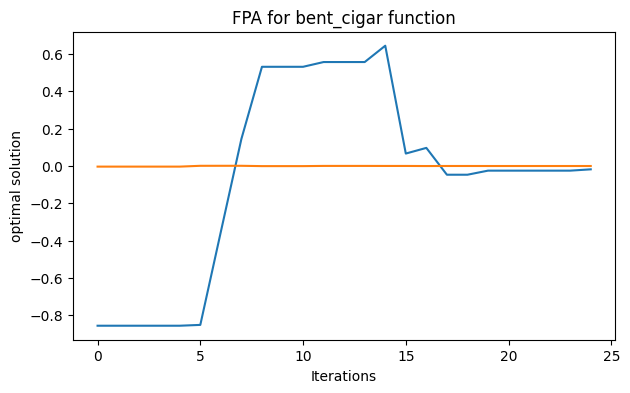

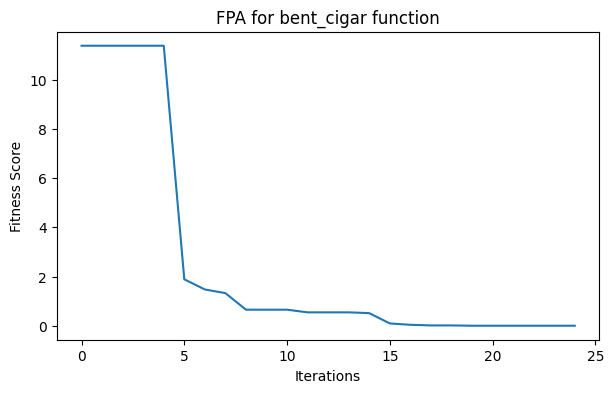

In [35]:
const = [np.array([-2.5, 2.5]), np.array([-1.5, 1.5])]
FPA_obj2 = Flower_Pollination_Algorithm(bent_cigar_function, switch_probability = 0.6, n_flowers = 30, n_parameters = 2, constraints = const)
sol, hist1, hist2 = FPA_obj2.optimize(25)
print(f"Optimal Solution: {sol}")
print(f"Optimal value : {bent_cigar_function(sol)}")

show_plot(list(range(25)), hist1, "FPA for bent_cigar function", "Iterations", "optimal solution")
show_plot(list(range(25)), hist2, "FPA for bent_cigar function", "Iterations", "Fitness Score")

Optimal Solution: [0.00012656 0.01437373]
Optimal value : 0.016223298686201516


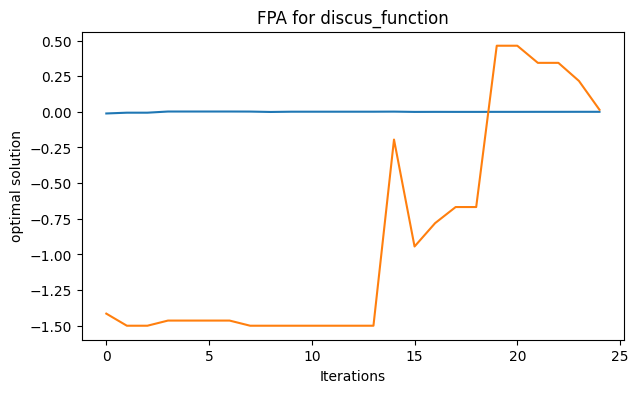

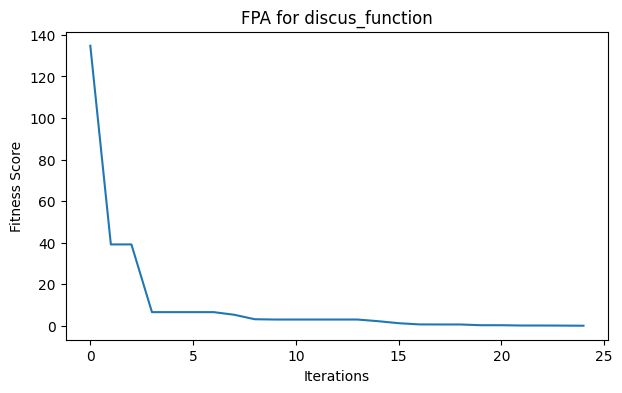

In [37]:
const = [np.array([-2.5, 2.5]), np.array([-1.5, 1.5])]
FPA_obj3 = Flower_Pollination_Algorithm(discus_function, switch_probability = 0.6, n_flowers = 30, n_parameters = 2, constraints = const)
sol, hist1, hist2 = FPA_obj3.optimize(25)
print(f"Optimal Solution: {sol}")
print(f"Optimal value : {discus_function(sol)}")

show_plot(list(range(25)), hist1, "FPA for discus_function", "Iterations", "optimal solution")
show_plot(list(range(25)), hist2, "FPA for discus_function", "Iterations", "Fitness Score")

Optimal Solution: [-0.00265236 -0.0012178 ]
Optimal value : 0.0016898806180876136


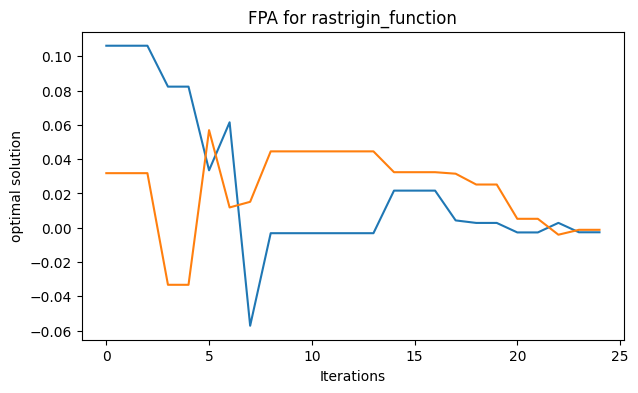

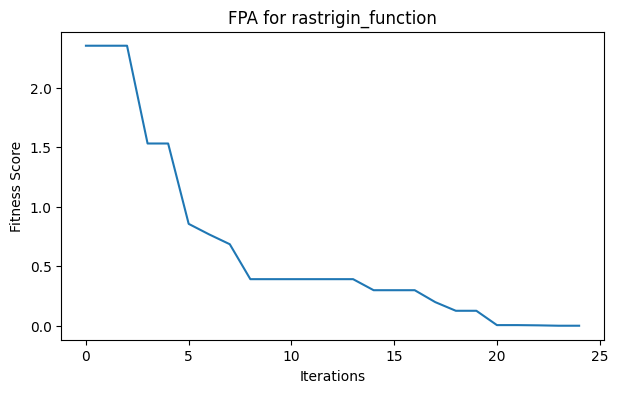

In [41]:
const = [np.array([-2.5, 2.5]), np.array([-1.5, 1.5])]
FPA_obj4 = Flower_Pollination_Algorithm(rastrigin_function, switch_probability = 0.6, n_flowers = 30, n_parameters = 2, constraints = const)
sol, hist1, hist2 = FPA_obj4.optimize(25)
print(f"Optimal Solution: {sol}")
print(f"Optimal value : {rastrigin_function(sol)}")

show_plot(list(range(25)), hist1, "FPA for rastrigin_function", "Iterations", "optimal solution")
show_plot(list(range(25)), hist2, "FPA for rastrigin_function", "Iterations", "Fitness Score")

## Implementation of Flower Pollination Algorithm for TSP :